<a href="https://colab.research.google.com/github/Walkhie/Exploring-Mental-Health-Data/blob/main/1)%20Preparacion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias Basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Librerías para el Pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

In [ ]:
# Lectura de los datos de entrenamiento
train = pd.read_csv('train.csv')
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Exploracion de los datos

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

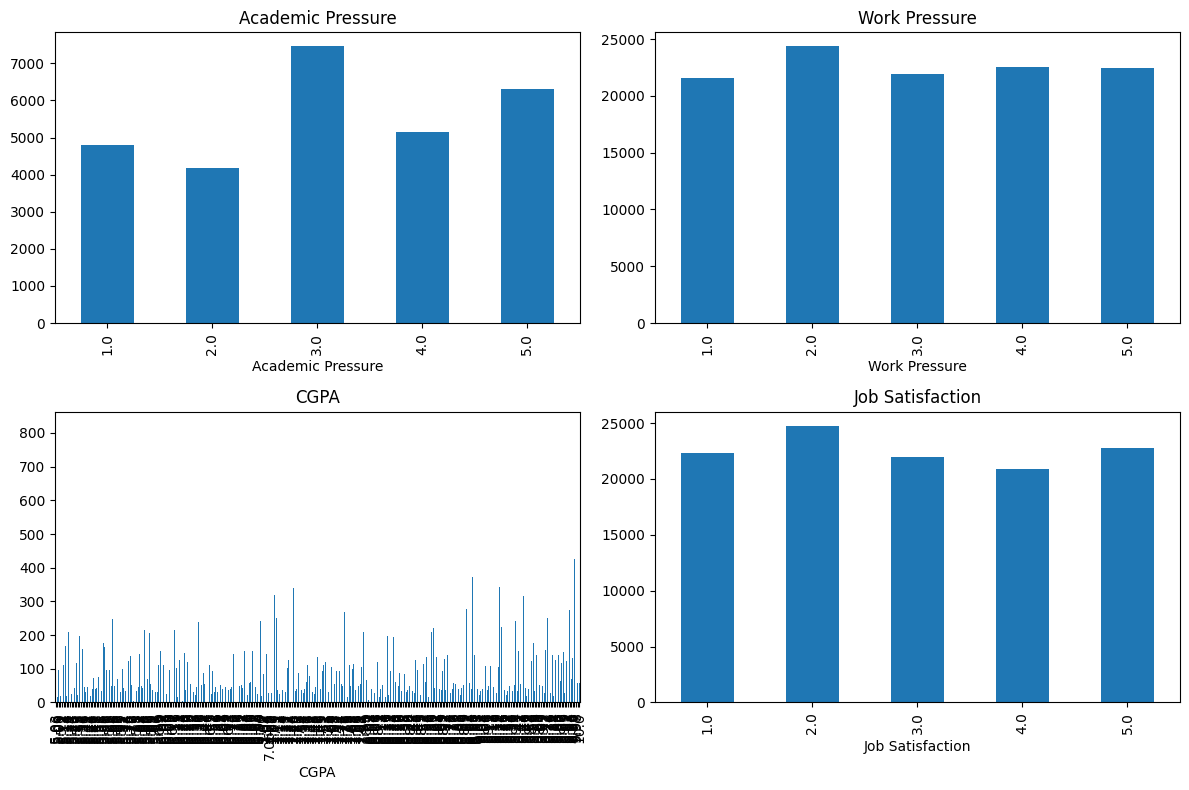

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Grafica de Academic Pressure
train['Academic Pressure'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Academic Pressure')

# Grafica de Work Pressure
train['Work Pressure'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Work Pressure')

# Grafica de CGPA
train['CGPA'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('CGPA')

# Grafica de Job Satisfaction
train['Job Satisfaction'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Job Satisfaction')

plt.tight_layout()
plt.show()

In [ ]:
print(f"[{train['CGPA'].min()},{train['CGPA'].max()}]")

[5.03,10.0]


<Axes: xlabel='Age'>

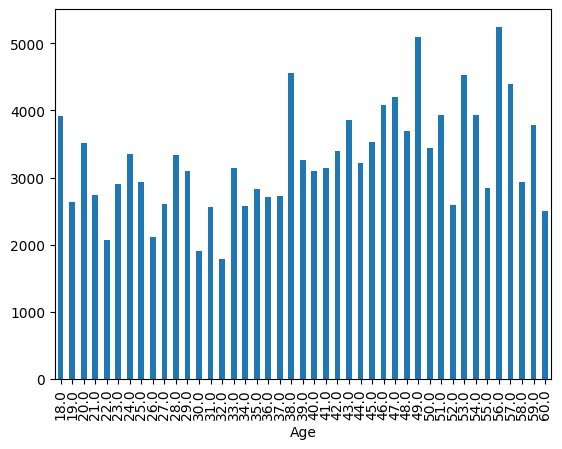

In [ ]:
train['Age'].value_counts().sort_index().plot(kind='bar')

### Datos NULOS en Academic Pressure,CGPA y Study Satisfaction

In [ ]:
#Se observa que hay muchos datos nulos en academic Pressure, CGPA, Study Satisfactiomn
# Vamos a ver cuantos nulos tienen
print(f" Academic Pressure Nulls: {sum(train['Academic Pressure'].isna())}")
print(f" Academic Pressure Nulls: {sum(train['Study Satisfaction'].isna())}")
print(f" Academic Pressure Nulls: {sum(train['CGPA'].isna())}")

 Academic Pressure Nulls: 112803
 Academic Pressure Nulls: 112803
 Academic Pressure Nulls: 112802


In [ ]:
# Vamos a filtar los registros que tienen datos nulos en las columnas
# Academic Pressure, Study Satisfaction y CGPA
mask = train[['Academic Pressure', 'Study Satisfaction', 'CGPA']].isnull().any(axis=1)
null_df = train[mask]
null_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0


In [ ]:
# Observamos si la razon por la que estan nulos los datos es pq son trabajadores
null_df['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,112794
Student,14


### Datos nulos en Job Satisfaction, Profession y Work Pressure

In [ ]:
#Se observa que hay muchos datos nulos en
# Vamos a ver cuantos nulos tienen
print(f" Job Satisfaction Nulls: {sum(train['Job Satisfaction'].isna())}")
print(f" Profession Nulls: {sum(train['Profession'].isna())}")
print(f" Work Pressure Nulls: {sum(train['Work Pressure'].isna())}")

 Job Satisfaction Nulls: 27910
 Profession Nulls: 36630
 Work Pressure Nulls: 27918


In [ ]:
# Vamos a filtar los registros que tienen datos nulos en las columnas
# Job Satisfaction, Profession y Work Pressure
mask = train[['Job Satisfaction', 'Profession', 'Work Pressure']].isnull().any(axis=1)
null_df2 = train[mask]
null_df2.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1


In [ ]:
# Se obseva que en 27901 de los casos de nulos, es porque son estudiantes y estas columnas no aplican para ellos
null_df2['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Student,27901
Working Professional,8765


## Imputacion


En nuestros datos encontramos dos tipos de perfiles: estudiantes y trabajadores. En algunas columnas tenemos informacion unicamente relevante para uno de estos dos perfiles, por lo tanto, cuando no aplica se encuentra un dato nulo, para fines de visualizacion en las columnas Academic Pressure, Study Satisfaction y CGPA se imputara con un valor de -1, conociendo que estas columnas van de 0 a 5, siendo el -1 el valor que va a representar la no aplicabilidad.

Tambien encontramos variables como 'Sleep Duration' y 'Dietary habits' que se pueden simplificar en 3 categorias (que son las de mayor frecuencia), por lo tanto, se van a intentar llevar todas las demas categorias a una de las 3 principales, si no es posible se colocara el valor 'UnKnown' para que despues sea convertido a un dato nulo y finalmente imputado.

In [ ]:
# Funcion que imputara a lo que llamamos nulos con sentido
def ajustedData(df : pd.DataFrame) -> pd.DataFrame:

    ## Vamos inputar en Academic Pressure, Study Satisfaction y CGPA -1 en donde "Working Professional or Student" sea igual a
    ## Working Professional, de esta manera se interpretara que no aplica

    # Filtramos por los datos nulos en las columnas
    null_mask = df[['Academic Pressure', 'Study Satisfaction', 'CGPA']].isnull().any(axis=1)

    # Juntamos el condicion de null_mask con la de Student
    student_null_mask = (df['Working Professional or Student'] == 'Working Professional') & null_mask

    # Imputamos donde se cumpla ambas condiciones
    df.loc[student_null_mask, ['Academic Pressure', 'Study Satisfaction', 'CGPA']] = -1

    ## Vamos inputar en Job Satisfaction y Work Pressure -1 en donde "Working Professional or Student" sea igual a
    ## Student, de esta manera se interpretara que no aplica

    # Filtramos por los datos nulos en las columnas
    null_mask2 = df[['Job Satisfaction', 'Work Pressure', 'Profession']].isnull().any(axis=1)

    # Juntamos el condicion de null_mask con la de Student
    student_null_mask2 = (df['Working Professional or Student'] == 'Student') & null_mask2

    # Imputamos donde se cumpla ambas condiciones
    df.loc[student_null_mask2, ['Job Satisfaction', 'Work Pressure']] = -1

    ## Para Profession vamos imputar con "Student"  en donde "Working Professional or Student" sea igual a
    ## Student

    # Imputamos donde se cumpla ambas condiciones
    df.loc[student_null_mask2, ['Profession']] = 'Student'

    return df




In [ ]:
# Función para clasificar la duración del sueño en 3 categorías
def categorizar_sueño(duracion):
    duracion = duracion.lower()
    if 'no' in duracion or duracion in ['pune', 'indore', 'sleep_duration', 'unhealthy', 'work_study_hours', 'moderate']:
        return 'Unknown'  # Asignar una categoría especial para valores ambiguos
    elif any(h in duracion for h in ['less than 5 hours', '3-4', '2-3', '4-5', '1-6', '1-2', '1-3']):
        return 'Less than 5 hours'
    elif any(h in duracion for h in ['5-6', '6-7', '7-8', '6-8', '8 hours', '5-8']):
        return '5-8 hours'
    elif any(h in duracion for h in ['more than 8', '9-11', '10-11', '8-9']):
        return 'More than 8 hours'
    else:
        return 'Unknown'  # Para valores numéricos que no caen en las categorías de sueño


# Transformador para aplicar la función sobre la columna "Sleep Duration"
def transformar_sueño(df):
    df['Sleep Duration'] = df['Sleep Duration'].apply(categorizar_sueño)
    return df


In [ ]:
def categorizar_dieta(habito):
    # Verifica si 'habito' es una cadena antes de proceder
    if isinstance(habito, str):
        habito = habito.lower()
        if 'unhealthy' in habito:
            return 'Unhealthy'
        elif 'healthy' in habito:
            if 'less' in habito or 'no' in habito or 'less than' in habito:
                return 'Moderate'
            elif 'more' in habito:
                return 'Healthy'
            else:
                return 'Healthy'
        elif 'moderate' in habito:
            return 'Moderate'
    # Asigna 'Unknown' a valores no reconocidos
    return 'Unknown'

# Transformador para aplicar la función de categorización
def transformar_dieta(df):
    df['Dietary Habits'] = df['Dietary Habits'].apply(categorizar_dieta)
    return df

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Paso 1: Imputación
class Imputacion(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return ajustedData(X)  # Función que realiza la imputación de datos nulos

# Paso 2: Transformación de Sueño
class TransformarSueño(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return transformar_sueño(X)  # Función que reduce las categorías de "Sleep Duration"

# Paso 3: Transformación de Dieta
class TransformarDieta(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return transformar_dieta(X)  # Función que reduce las categorías de "Dietary Habits"

In [ ]:
AjustedPipe = Pipeline([
    ('imputacion', Imputacion()),             # Paso 1: Imputacion de los datos nulos con sentido
    ('Categorizar Sueño', TransformarSueño() ),   # Paso 2: Reducir categorias de la variable "Sleep Duration"
    ('Categorizar Dieta', TransformarDieta())     # Paso 3: Reducir categorias de la variable "Dietary Habits"
])

In [ ]:
AjustedPipe

Pipeline(steps=[('imputacion', Imputacion()),
                ('Categorizar Sueño', TransformarSueño()),
                ('Categorizar Dieta', TransformarDieta())])

In [ ]:
trainAjusted = AjustedPipe.fit_transform(train)
trainAjusted.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,-1.0,5.0,-1.00,-1.0,2.0,5-8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,-1.0,4.0,-1.00,-1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,-1.0,8.97,2.0,-1.0,5-8 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,-1.0,5.0,-1.00,-1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,-1.0,1.0,-1.00,-1.0,1.0,5-8 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Pandas Profiling

In [ ]:
trainAjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             131937 non-null  object 
 7   Academic Pressure                      140691 non-null  float64
 8   Work Pressure                          140680 non-null  float64
 9   CGPA                                   140691 non-null  float64
 10  Study Satisfaction                     140690 non-null  

In [ ]:
# Correccion de tipo
trainAjusted['Academic Pressure'] = pd.to_numeric(trainAjusted['Academic Pressure'], errors='coerce').astype(pd.Int64Dtype())
trainAjusted['Age'] = pd.to_numeric(trainAjusted['Age'], errors='coerce').astype(pd.Int64Dtype())
trainAjusted['Work Pressure'] = pd.to_numeric(trainAjusted['Work Pressure'], errors='coerce').astype(pd.Int64Dtype())
trainAjusted['Study Satisfaction'] = pd.to_numeric(trainAjusted['Study Satisfaction'], errors='coerce').astype(pd.Int64Dtype())
trainAjusted['Job Satisfaction'] = pd.to_numeric(trainAjusted['Job Satisfaction'], errors='coerce').astype(pd.Int64Dtype())

categorical_cols = ['Name','Gender', 'City', 'Working Professional or Student', 'Profession',
                    'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in categorical_cols:
    trainAjusted[col] = trainAjusted[col].astype('category')

In [ ]:
trainAjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   id                                     140700 non-null  int64   
 1   Name                                   140700 non-null  category
 2   Gender                                 140700 non-null  category
 3   Age                                    140700 non-null  Int64   
 4   City                                   140700 non-null  category
 5   Working Professional or Student        140700 non-null  category
 6   Profession                             131937 non-null  category
 7   Academic Pressure                      140691 non-null  Int64   
 8   Work Pressure                          140680 non-null  Int64   
 9   CGPA                                   140691 non-null  float64 
 10  Study Satisfaction                     14069

In [ ]:
# Cargar librería para Profiling
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(trainAjusted, minimal=True) # minimal=False
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## PipeLine Preparacion de los Datos

In [ ]:
# Se separar las predictoras y la objetivo
X = trainAjusted.drop(['Depression'], axis=1)
y = trainAjusted['Depression']

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['Gender','Working Professional or Student', 'Sleep Duration', 'Dietary Habits', ' Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numeric_cols = ['Age','Academic Pressure','CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

In [ ]:
# Variables Irrelevantes
def eliminar_variables_irrelevantes(df):
  # Se elimina "name" por ser un variable protegida por ley e Id se elimina por irrelevancia
  # Se elimina 'City'porque queremos generar un modelo global
    return df.drop(['id','Name','City'], axis=1)

In [ ]:
#Paso 1: Limpiar atípicos
def eliminar_outliers(X):
    #Se asigna valor nulo a los atípicos
    X.loc[~X["Academic Pressure"].isin([1, 2, 3, 4, 5, -1]), "Academic Pressure"] = np.nan
    X.loc[~X["CGPA"].isin([0,1,2,3,4,5,6,7,8,9,10,-1]), "CGPA"] = np.nan
    X.loc[~X["Work Pressure"].isin([1, 2, 3, 4, 5, -1]), "Work Pressure"] = np.nan
    X.loc[~X["Study Satisfaction"].isin([1, 2, 3, 4, 5, -1]), "Study Satisfaction"] = np.nan
    X.loc[~X["Job Satisfaction"].isin([1, 2, 3, 4, 5, -1]), "Job Satisfaction"] = np.nan
    X.loc[~X["Financial Stress"].isin([1, 2, 3, 4, 5]), "Financial Stress"] = np.nan
    X.loc[~X['Sleep Duration'].isin(['Less than 5 hours', '5-8 hours', 'More than 8 hours']), 'Sleep Duration'] = np.nan
    X.loc[~X['Dietary Habits'].isin(['Healthy', 'Unhealthy', 'Moderate']), 'Dietary Habits'] = np.nan
    return X
# Limpiar atipicos de todas las variables. Tenga o no  atipicos en este momento.

In [ ]:
# Paso 2: Imputar y transformaciones

# Para variables numéricas: Imputar por media y normalizar
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Para variables categóricas: imputar por moda y crear dummies
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('dummies', OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False))
])

# Unir los dos pasos anteriores
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

In [ ]:
# Definir el pipeline completo

pipe = Pipeline(steps=[
    ('imputacion', AjustedPipe ),
    ('eliminar variables irrelevantes', FunctionTransformer(eliminar_variables_irrelevantes)),
    ('outliers', FunctionTransformer(eliminar_outliers)),
    ('Preprocesamiento', preprocessor)
])

pipe

Pipeline(steps=[('imputacion',
                 Pipeline(steps=[('imputacion', Imputacion()),
                                 ('Categorizar Sueño', TransformarSueño()),
                                 ('Categorizar Dieta', TransformarDieta())])),
                ('eliminar variables irrelevantes',
                 FunctionTransformer(func=<function eliminar_variables_irrelevantes at 0x7f232abdf0a0>)),
                ('outliers',
                 FunctionTransformer(func=<function eliminar_outliers at 0x7f232a9c...
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummies',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Sleep Duration',
                                                   'Dietary Habits',
                                                   ' Have you ever had '
                                                   'suicidal thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness'])]))])